# Python Scientific Computation Worksheet

This worksheet is intended to be a hands-on tutorial about using the `numpy`, `pandas`, and `matplotlib` packages using a somewhat familiar data set, called `mpg.csv` (having very similar data to `mtcars`).

A quick Jupyter tip: you can autocomplete a lot of your variables and functions by pressing Tab. Try it out!


# Intro to Pandas

The `pandas` package implements data frames, which are similar to those in `R`. As with all packages, we'll have to install it beforehand.

**Exercise**.
Import the following packages with the `import` statement:
- `numpy` as `np`
- `pandas` as `pd`

In [8]:
# import libraries here

A pandas `DataFrame` has very similar properties to a R data frame, specifically:

1. You can have row and column names in the data frame.
2. You can have different columns that contain different data types.
3. Individual columns must have the same data types.

If you're curious about everything that you can do in a data frame, the documentation is [here](https://pandas.pydata.org/docs/reference/frame.html), although by no means is it expected that you read it. However, it might be helpful if you're looking for functionality that is not contained in the tutorial.

Let's explore `pandas` in the context of the `mpg` data set, which is contained in the `"mpg.csv"` file. We can use the `read_csv()` function from `pandas` to load it in as a data frame.

**Exercise**. First, load in the mpg data set using the `read_csv()` function from `pandas` by filling in the parentheses with the file name.

In [10]:
# fill in file name here
mpg_df = pd.read_csv(...)

Here are some data attributes (ie. variables that belong to a specific data frame) that are useful to getting a sense of the data in the data frame:

* `shape`. This is contains the shape of the dataframe (i.e. rows by columns) -- this is a list of size 2, with:
    * `df.shape[0]` being the number of rows.
    * `df.shape[1]` being the number of columns.
* `index`. This contains the rownames.
* `columns`. This contains the column names.
* `axes`. This is a list that contains the rownames as the first element and colnames as the second (i.e. `[index, columns]`).

Since these are variables and not functions, you do not use parentheses when accessing these. However, data frames have many functions that belong to them as well, for example:

* `head()`
* `tail()`
* `mean()`
* ... etc.

To use any of the variables or functions, you would type something like follows:
```
mpg_df.shape  # this is NOT a function -- no parentheses!
mog_df.tail()  # this IS a function -- use parentheses!
```

**Exercise.** Let's examine the data contained in the data frame.

1. Print the `axes` and `shape` of `mpg_df`. These are variables, not functions -- how would you access these variables? (Hint: do you need parentheses or not?)
2. Then, call the `head()` function *from* the `mpg_df` data.
3. Finally, from the output from above, answer the following questions:
    1. How many rows are in the data frame? 
    2. How many columns are in the data frame?
    3. What are the names of the columns?
    
To answer the questions, add comments in the code blocks!

In [ ]:
# examine the mpg data frame here

## Accessing Rows/Columns in a Dataframe
Unfortunately getting rows/columns in a `pandas` dataframe is more complicated than R, and there's many different syntaxes.

### What Doesn't Work: Brackets on their own
Unfortunately, we can't use the simple syntax from R to access elements in a data frame.

**Exercise.** Uncomment the following line of code, run it, and comment it back again (since it doesn't work).

In [ ]:
# mpg_df[0, 0]

### Accessing data by index (`.iloc[]`)
This is likely the most familiar way to select data from a dataframe. You use the **`.iloc[, ]`** accessor (think iloc as "index location"). Much like R, you can pass the rows to the first value, and the columns to the second value. As a reminder, the first row/column is number 0, the second is number 1, etc. For example, `mpg_df.iloc[0, 0]` gets the top-left cell in the `mpg_df` dataframe.

- To get an entire column, you *must* specifically request all rows. For example, to get the second column, you would *have* to write `mpg_df.ilog[:, 1]`.
- To get an entire row, you can avoid using the comma. For example, to get the second column, you could write `mpg_df.iloc[1, :]` or `mpg_df.iloc[1]`. **In the rest of the tutorial, I'll use the first version (`mpg_df.iloc[1, :]`) for ease of readability,** even though it's slightly suboptimal.
- To get a *continuous* range of rows or columns, you can specify the range with the colon. For example, to get the first and second columns, you could write `mpg_df.iloc[:, 0:2]`. *Observe that like most things in Python, the last index is not included*.
- To get a *noncontinuous* range of rows or columns, you can pass a list. For example, to get the first and third rows, you would write `mpg_df.iloc[[0,2], :]`.

**Exercise.** Access the following data from `mpg_df` using `.iloc[]`. Again, remember that the first row and column is 0.

1. Get third element in the last column.
2. Get the first three rows.
3. Get the third, fourth, and fifth columns.
4. Get the second and fifth rows.

In [232]:
# practice accession with iloc here
# 1. third element, last column
ans1 = ...
# assert(ans1 == "plymouth satellite")

# 2. third three rows
ans2 = ...
# assert(ans2.shape == (3, 9))
# assert(np.all(ans2["name"] == ["chevrolet chevelle malibu", "buick skylark 320", "plymouth satellite"]))

# 3. third, fourth, and fifth columns
ans3 = ...
# assert(ans3.shape == (398, 3))
# assert(np.all(ans3.columns == ["displacement", "horsepower", "weight"]))

# 4. second and fifth rows
ans4 = ...
# assert(ans4.shape == (2, 9))
# assert(np.all(ans4.name == ["buick skylark 320", "ford torino"]))

### Accessing (column) data by name
There's a lot of ways to get a columns by name. **For the sake of simplicity, I'll use the single-bracket `[]` method** to access columns by name in the examples, as it is closest to the dollar sign in R in terms of usage. However, you'll see the following methods in other scripts:

* Using a period, `mpg_df.mpg`.
* Using `.loc[]` e.g. `mpg_df.loc[:, "mpg"]`. This allows you to select rows as well as columns by name.
* Using *double* square brackets, for example `mpg_df[["mpg"]]`. **Note that this returns a 2D data frame, rather than an array**. This method has the benefit of being able to select multiple columns, such as by `mpg_df[["mpg", "name"]]`. (This is technically the same method as the single square brackets, as I'll explain soon).

#### Using `[]`
As mentioned previously, these square brackets are virtually identical to the dollar sign in R. The only difference is that you'll have to pass the column name as a string. For example, to get the "mpg" column as an array:

In [20]:
mpg_df["mpg"]

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

To get more than one column name, you can pass a list to the single brackets, which is why there's two square brackets. Since python detects that we're using a list, it will get a 2D data frame to contain the columns we're selecting (this is why the double brackets for one column will still return a data frame). So for example, to get the `mpg` and `name` columns, I can do the following:

In [242]:
mpg_df[["mpg", "name"]]

,mpg,name
0,18.0,chevrolet chevelle malibu
1,15.0,buick skylark 320
2,18.0,plymouth satellite
3,16.0,amc rebel sst
4,17.0,ford torino
...,...,...
393,27.0,ford mustang gl
394,44.0,vw pickup
395,32.0,dodge rampage
396,28.0,ford ranger


**Exercise**. Using the square brackets `[]`, access the `name` column in `mpg_df`.

In [ ]:
# access the name column here with `[]`.

#### Using `.loc[]`
This is the name equivalent to `.iloc[]`. For `.loc[]` to work, make sure that you are passing a *string*! Like `.iloc[]`, you need to specify the NAMES for both the row and the columns. For example, to get the `mpg` column, you would write `mpg_df.loc[:, "mpg"]`:

In [247]:
mpg_df.loc[:, "mpg"]

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

Much like the square brackets, we can get more than one row or column by passing a list:

In [270]:
mpg_df.loc[:, ["mpg", "horsepower"]]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
393,27.0,86.0
394,44.0,52.0
395,32.0,84.0
396,28.0,79.0


In [271]:
# the same goes for rows; here's a combined example
mpg_df.loc[[0, 1], ["mpg", "horsepower"]]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0


For our data frame, our row names are equal to their index so we can use numbers to select the rows. This can get confusing, as the range will now become *inclusive* of the end index. For example, to access the first two rows, we will run the following code:

In [250]:
# pay close attention to the row indices
two_rows_loc = mpg_df.loc[0:1, :]
# COMPARE WITH .iloc:
two_rows_iloc = mpg_df.iloc[0:2, :]

# these two are EQUAL, because .loc is inclusive of the end index
assert(np.all(two_rows_loc == two_rows_iloc))
two_rows_loc

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


The main reason we're introducing `.loc[]` is for boolean indexing. We'll cover it more depth in a few code blocks!

To rephasize: when accessing rows with `.loc[]`, you will supply the *row names*. That means that selecting rows with a range will be *inclusive* of the the last element. The takeaway is to **be care with using `.loc[]` with numeric indices.** It works for our dataframe (in the case of rows), but it won't necessary work in the future.

**Exercise**. Using `.loc[]`, access the following elements:
1. Get third element in the `displacement` column.
2. Get the first three rows.
3. Get the `mpg`, `horsepower`, and `weight` columns.
4. Get the last element of the `name` column.

In [268]:
# 1. third element in the displacement column
ans1 = ...
# assert(ans1 == 318)

# 2. first three rows
ans2 = ...
# assert(ans2.shape == (3, 9))
# assert(np.all(ans2.axes[0] == [0, 1, 2]))

# 3. mpg, horsepower, and weight columns
ans3 = ...
# assert(ans3.shape == (398, 3))
# assert(np.all(ans3.columns == ["mpg", "horsepower", "weight"]))

# 4. last element of the name column
ans4 = ...
# assert(ans4 == "chevy s-10")

## Adding New Columns

To add a new column, we can use the single square bracket operator in the same way we could use the dollar sign in R, with the exception that we need to pass a string. As an example, I'll create a new, smaller data frame and add a column as to not mess with our original data. Be sure to understand what the code is doing! We'll be manipulating columns in the boolean indexing section.

In [83]:
mpg_small = mpg_df.iloc[0:5, 0:2]
mpg_small["newcolumn"] = [0, 1, 2, 3, 4]

# compare this to R code:
# mpg_small = mpg_df[1:5, 1:2]
# mpg_small$newcolumn = c(0, 1, 2, 3, 4)

mpg_small

,mpg,cylinders,newcoumn
0,18.0,8,0
1,15.0,8,1
2,18.0,8,2
3,16.0,8,3
4,17.0,8,4


## Boolean Indexing
As with R, `pandas` implements boolean indexing, which is much faster and more concise than selecting elements using a `for` loop. Here's an example of how you can apply vectorized comparisons:

In [92]:
mpg_small = mpg_df.iloc[0:5, 0:2]
print(mpg_small)
bool_mask_mpg = first_five_mpgs >= 17.0

bool_mask_mpg

    mpg  cylinders
0  18.0          8
1  15.0          8
2  18.0          8
3  16.0          8
4  17.0          8


0     True
1    False
2     True
3    False
4     True
Name: mpg, dtype: bool

In the same way as in R, we can use this `bool_mask_mpg` object in conjunction with either `.iloc[]` or `.loc[]` to access the elements we want.

**Exercise**. With regards to the `bool_mask_mpg` we just made, answer the following questions:
1. Print the length of the `bool_mask_mpg`. (Review: which function gets the length of a list?)
2. Print the number of rows in `mpg_small`. What does this number resemble? (Review: how can we get the dimensions of a data frame?)
3. Use the `sum()` function to count the number of `True` values in `bool_mask_mpg`. Since `bool_mask_mpg` is a numpy array, we can use the `sum()` function from numpy. What are the two ways we can call the `sum()` function? (As in R, `True` is 1 and `False` is 0).
4. Predict the outcome of the following line of code after applying the mask: in a comment, write the contents of the table. How many rows are there in the table? Looking at your previous answers, why does this number make sense?

In [ ]:
# Write what you think the table will contain here!
# mpg     cylinders

# applying the mask
# note that this code does NOT modify mpg_small
mpg_small.loc[bool_mask_mpg, :]

Let's finish off this section with more indexing practice:

**Exercise**. Let's say we're *really* interested in the data for Honda Civics. Uncomment and fill in the underscores below to get the data for this model. (The `name` column contains the model name data we're interested in.) Then, use the `mean()` function from `numpy` to get the mean *weight* of the Honda Civics in the data set, and print it out with the f-string syntax.

In [102]:
# honda_civic_mask = ____________ "honda civic"
# honda_civic_data = mpg_df.___[___]

# print(f"There are {len(honda_civic_mask)} Honda Civics in the data set.")

# mean_honda_civic_weight = __________
# print(_"The mean weight of the Honda Civics is {______}")

# assert(mean_honda_civic_weight == 2083.0)
# honda_civic_data

**Exercise**. Now, we're interested in comparing American vs. European cars. Let's compare the mpg and horsepower for both of the cars in these categories:
1. Create two boolean masks to select for American and European cars. This data is stored in the `origin` column as `usa` and `europe`, respectively.
2. Create two new dataframes containing ONLY the `mpg` and `horsepower` data for American and European cars, respectively. (Hint: to get more than one column, we can use a list of our column names, e.g. `[name1, name2]`).
3. Inspect the dimensions of both dataframes: using the f-string printing formatting, print out this information. The template is provided for you; don't forget to add the f when printing!
4. Finally, use the `mean()` function from **pandas** to calculate the means of each column, then print the results (print it directly; it does not have to be formatted). *For functions like these, you will have to call it from the data frame*. For example, to get the median for each column, you would write `df.median()`; to get the max value in each column, you would write `df.max()`.
5. What do you notice about American vs. European cars in the data set?

In [ ]:
# 1.
usa_mask = ...
eur_mask = ...

# 2.
columns_of_interest = [____]  # fill in here
usa_mpg_df = ...
eur_mpg_df = ...

# 3. 
# "There are __ rows and __ columns in the American Car Data Set."
# "There are __ rows and __ columns in the European Car Data Set."

# 4.
# print(the mean for usa here)
# print(the mean for eur here)

# 5. Record your observations:

### Assigning Categories
In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to `ifelse()`. That is:

1. The first parameter is the condition (a boolean vector; that is, `True` and `Falses`).
2. The second parameter is the value to fill the `True` values.
3. The third parameter is the value to fil lthe `False` values.

The following example shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [129]:
# remember that to use our vectorized operations, we need to make sure our data is in an array
# pandas luckily does this for us
# we'll be adding to this data frame for instructive purporses

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
# odds will be True, evens will be False
# we add this information as a new column
boolean_vector = (number_example_array % 2 == 1)
number_example_array["boolean_vector"] = boolean_vector # we could do this in one step

# we add a third column saying if our value is odd or even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")

number_example_array

,nums,boolean_vector,parity
0,0,False,Even
1,1,True,Odd
2,2,False,Even
3,3,True,Odd
4,4,False,Even
5,5,True,Odd


**Exercise**. Let's say we're interested in categorizing each car as "efficient" or "inefficient":
1. Let's say cars with a `mpg` greater than 30 is efficient. Create a new column, called `efficiency_status`, where efficient cars are called `"efficient"`, and inefficient cars are `"inefficient"`, using the `np.where()` function.
2. Separate the cars out by their efficiency status in a similar way as the previous exercise. This time, keep all the columns in the data frame. (You may want to make a boolean mask first).
3. Finally, find the median `mpg` for each data frame:
    1. Access the mpg column.
    2. Call `np.median()` on the mpg column, and store it in a variable. Repeat for the other data frame.
    3. Print them out using the print template below.
    
Do these median values make sense? Why or why not?

In [13]:
# 1. Create the efficiency_status column in mpg_df

# 2. Create the two data frames with efficient vs. inefficient cars
efficient_mpg_df = ...
inefficient_mpg_df = ...

# 3. find the median mpg and print it
# "The median mpg for efficient cars is ____"
# "The median mpg for inefficient cars is ____"

#  For this to print properly, you may need to use single quotes to access the 'mpg' column:
#  e.g efficient_mpg_df['mpg'] rather than efficient_mpg_df["mpg"]
#  (This is because our main quote has double quotes)



# Matplotlib
`matplotlib` is the main plotting package in Python. Specifically, we will be using the `pyplot` module from `matplotlib` (the package is massive, so it's preferable to just get the specific module you need). Here's how you typically would import a specific module from a package:

In [3]:
import matplotlib.pyplot as plt

The workflow behind `pyplot` is as follows:
1. Set up the environment to make the plot.
2. Create the plot.
3. Show the plot and/or save it to a fil). 

For example, let's plot a simple parabola:

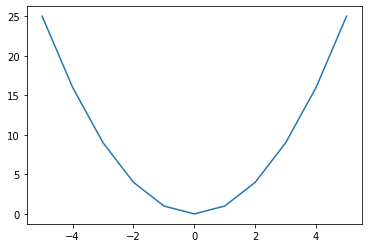

In [276]:
# 0. Getting our data to plot
x_vals = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
y_vals = x_vals ** 2  # this is the Python syntax to raise a number to a power
# e.g. you can write x_vals ** 3 to cube a number, x_vals **  to take the square root, etc.

# 1. Set up the plot environment

# Note that one function can have 2+ return values in Python
# plt.subplots controls the number of subplots and how they're placed
# In this case, we just want one plot (one row, one column)
fig, ax = plt.subplots(1, 1)  


# 2. Use the ax variable to plot the data
#    fig doesn't really ever get used in my experience
ax.plot(x_vals, y_vals)

# 3. Show the plot
plt.show()

Let's break down all the objects we made:
* `fig` doesn't really ever get used.
* `ax` controls the axes -- in short, it controls the variables you plot, the plot labels, etc.
* `plt` is the plot module you imported, which you can think of as a "plot window." Basically, the plots you made get saved to `plt`, and from there you can see the plots you made.


You can look into the `matplotlib.figure` module on your own time to see all the options. However, the following code is a good starting point for creating plots side-by-side, using subplots and labeling the axes (using the `set` function):

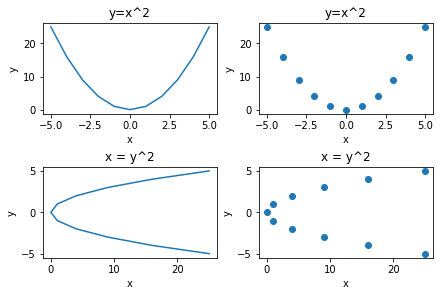

In [158]:
# good to know: constrained_layout spaces the plots out so plot titles don't overlap
fig, ax = plt.subplots(2, 2, constrained_layout=True)

# ax is an list of lists (2D list) -- you need two brackets to access the data
# think of it as a grid:

# [0][0]  [0][1]
# [1][0]  [1][1]

ax[0][0].plot(x_vals, y_vals) 
ax[0][0].set(title = "y=x^2", xlabel='x', ylabel='y')

ax[0][1].scatter(x_vals, y_vals) # makes a scatter plot
ax[0][1].set(title = "y=x^2", xlabel='x', ylabel='y')

ax[1][0].plot(y_vals, x_vals)
ax[1][0].set(title = "x = y^2", xlabel='x', ylabel='y')

ax[1][1].scatter(y_vals, x_vals)
ax[1][1].set(title = "x = y^2", xlabel='x', ylabel='y')

plt.show()

The most common plots you'll make are likely the following:

1. A scatter plot: use `scatter(x, y)`.
2. A connected line: use `plot(x, y)`. (The values must be sorted for this function to work).
3. A histogram: use `hist(x)`.

Let's do similar analysis as we did with the `mtcars` dataset. 

**Exercise**. (Scatter plots). First, let's look at how mpg (on the y-axis) is affected by the horsepower (on the x-axis) by plotting a *scatter* plot. The `c` parameter colors the points; in this case, color by the number of cylinders. Be sure to label your axes!

Note: the `alpha` parameter controls the parameters. Also, feel free to refer to the [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) documentation for more options!

In [ ]:
# Create your plot here: you may want to refer to the previous examples
fig, ax = ...

ax.scatter(x = ...,  # get the horsepower column from mpg_df
           y = ...,  # get the mpg column from mpg_df
           c = ...,  # get the cylinders column from mpg_df
           alpha = 0.6)

ax.set(xlabel = ..., ylabel = ...)
fig.suptitle(...)

plt.show()

**Exercise**. (Boxplots) Make a boxplot of weight using the `boxplot()` function. Unfortunately, it's quite difficult to "split" the boxplot by categories (e.g. origin) using matplotlib. If you're curious, some ways to do so are presented [here](https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots).

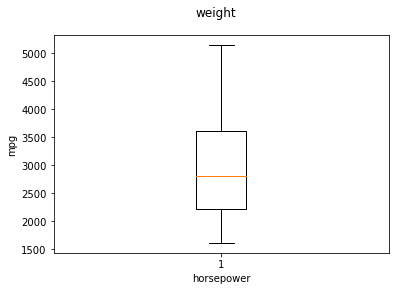

In [282]:
# Create your boxplot here!

**Exercise**. Let's visualize mpg and horsepower using our `usa_mpg_df` and `eur_mpg_df` data frames. Create a 2 row by 2 column comparison, where the first column is American cars, and the second is European cars:

1. Plot a histogram of the mpg as the first row.
2. Plot a scatter plot of mpg (y-axis) vs. horsepower (x-axis) as the third row.

As always, give informative labels to the plots! You will probably want to copy and paste the example code for the 2 x 2 plots and modify it for your needs.

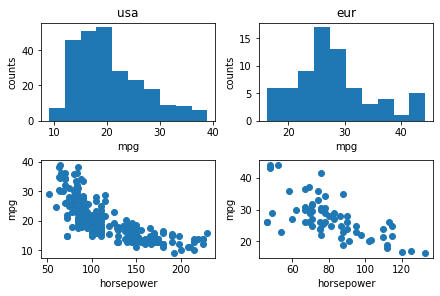

In [303]:
# Create the 2x2 plot here

A note on the previous exercise: matplotlib will actually assign colors for you if you plot to the same plot. So we can run the following code to remove the second column. However, visually , it doesn't look super great.

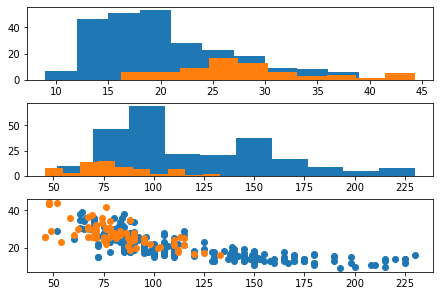

In [304]:
fig, ax = plt.subplots(3, 1, constrained_layout=True)

# here, since we just have 1 column, we do not need two brackets
ax[0].hist(usa_mpg_df["mpg"]) 
ax[0].hist(eur_mpg_df["mpg"]) 
ax[0].set(ylabel='counts', xlabel='mpg')


ax[1].hist(usa_mpg_df["horsepower"]) 
ax[1].hist(eur_mpg_df["horsepower"]) 
ax[1].set(ylabel='counts', xlabel='horsepower')

ax[2].scatter(usa_mpg_df["horsepower"], usa_mpg_df["mpg"])
ax[2].scatter(eur_mpg_df["horsepower"], eur_mpg_df["mpg"])
ax[2].set(ylabel="mpg", xlabel="horsepower")


plt.show()

## Plotting with seaborn

From the previous examples, you might notice that our plots lack figures, and from the boxplot example, it can require a lot of work to wrangle the data to make it plot nicely. `seaborn` is a nice package that makes prettier plots with more control over the figure. As always, install the package and load it as usual.

In [5]:
import seaborn as sns  # sns is standard

Here's how you make a scatter plot with seaborn, for example:

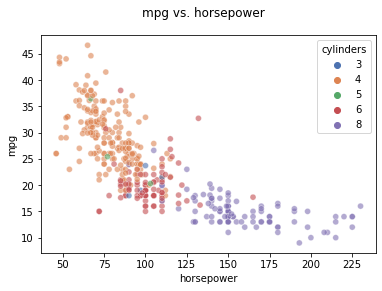

In [284]:
fig, ax = plt.subplots(1, 1)

sns.scatterplot(
    x = mpg_df["horsepower"],  # x-axis
    y = mpg_df["mpg"], # y-axis
    hue = mpg_df["cylinders"], # color/fill
    legend = "full",  # show the legend
    palette = "deep",  # OPTINAL: color palette
    alpha = 0.6,  # OPTINAL: transparency
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('mpg vs. horsepower')  # set title


plt.show()

Notice a few differences:
1. The axes are automatically labelled based on the name of the columns. (You can still use `ax.set()` to change the labels).
2. Adding the legend can be done by specifying one argument in the function.
3. You can specify the color palette easily.
4. The syntax is more intuitive and user-friendly (in my opinion).

To create plots side by side, we can use the ax argument in the same way as with matplotlib. Here's a demo, containing a line plot and a histogram:

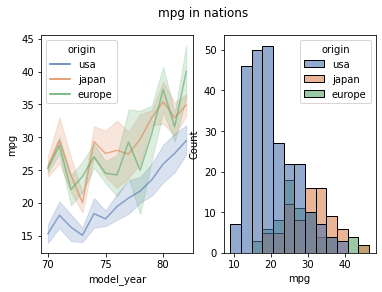

In [11]:
fig, ax = plt.subplots(1, 2)


sns.lineplot(
    x = mpg_df["model_year"],  # x-axis
    y = mpg_df["mpg"], # y-axis
    hue = mpg_df["origin"], # color
    legend = "full",  # show the legend
    palette = "deep",  # OPTINAL: color palette
    alpha = 0.6,  # OPTINAL: transparency
    ax = ax[0]  # necessary for when plotting more than 1 subplot
)

sns.histplot(
    x = mpg_df["mpg"],  # x-axis
    hue = mpg_df["origin"],
    legend = "full",  # show the legend
    palette = "deep",  # OPTINAL: color palette
    alpha = 0.6,  # OPTINAL: transparency
    ax = ax[1]  # necessary for when plotting more than 1 subplot
)

fig.suptitle('mpg in nations')  # set title


plt.show()

**Exercise**. Do the following:
1. Set up a 1 x 2 plot window (i.e. 2 plots side by side).
2. In the first plot window, use `seaborn` to make a histogram of `horsepower` using the `histplot()` function.
3. In the second plot window, use `seaborn` to make boxplots of `horsepower` by `origin` using the `boxplot()` function.
4. What can you conclude about car manufacturers? Are there other factors other than origin that could contribute to acceleration distributions that we see?

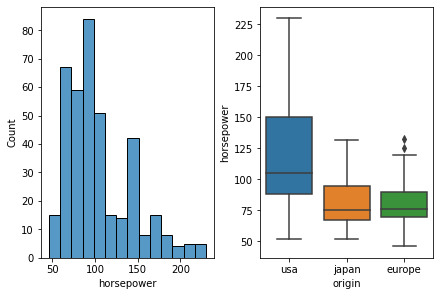

In [308]:
# Create your plots here

### Saving Plots
Finally, to save a plot, we can call `plot.savefig()` INSTEAD of the plot. For example, to save the `mpg` figure I previously made, we can do the following:

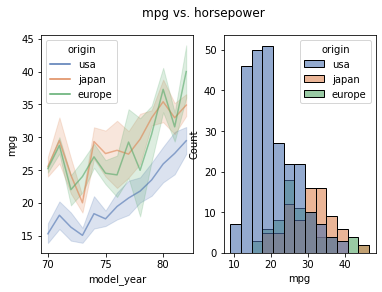

In [12]:
fig, ax = plt.subplots(1, 2)


sns.lineplot(
    x = mpg_df["model_year"],  # x-axis
    y = mpg_df["mpg"], # y-axis
    hue = mpg_df["origin"], # color
    legend = "full",  # show the legend
    palette = "deep",  # OPTINAL: color palette
    alpha = 0.6,  # OPTINAL: transparency
    ax = ax[0]  # necessary for when plotting more than 1 subplot
)

sns.histplot(
    x = mpg_df["mpg"],  # x-axis
    hue = mpg_df["origin"],
    legend = "full",  # show the legend
    palette = "deep",  # OPTINAL: color palette
    alpha = 0.6,  # OPTINAL: transparency
    ax = ax[1]  # necessary for when plotting more than 1 subplot
)

fig.suptitle('mpg vs. horsepower')  # set title

# REPLACE plt.show(), otherwise it doesn't work
# the second argument gets rid of white space around the figure, which you would have to crop out on your own later
plt.savefig('mpg.png', bbox_inches='tight')

**Exercise**. Create your horsepower plots again, and save it as `"horsepower.png"`.

In [ ]:
# Save your horsepower plot here (from the previous exercise)